In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
import glob


In [4]:
import urllib.request

url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
week_nums = [180505, 180512, 180519, 180526, 180602, 180609, 180616, 180623, 180630,
            180707, 180714, 180721, 180728, 180804, 180811, 180818, 180825]
project_data = []
for week_num in week_nums:
    project_data.append(urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{week_num}.txt",
                               f"turnstile_{week_num}.txt"))



In [5]:
pwd

'/Users/dennisssekamaanya/MetisMarch2021/MetisProject1/projectData'

# Source of Project Data: http://web.mta.info/~/turnstile_{}.txt
This project is using 3 months namely: May 2018, June 2018 and July 2018

In [6]:
mtadf = pd.concat(map(pd.read_csv, glob.glob('./*.txt')))

In [7]:
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481


In [8]:
mtadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344150 entries, 0 to 195237
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [9]:
mtadf.describe()

,ENTRIES,EXITS
count,3.344150e+06,3.344150e+06
mean,4.013277e+07,3.283800e+07
std,2.076983e+08,1.910286e+08
min,0.000000e+00,0.000000e+00
25%,5.043868e+05,2.417360e+05
50%,2.527890e+06,1.437624e+06
75%,6.923466e+06,4.822229e+06
max,2.144893e+09,2.146093e+09


In [10]:
mtadf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [11]:
mtadf.columns = [column.strip() for column in mtadf.columns]

In [12]:
mtadf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481


In [14]:
mtadf.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
195233,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/27/2018,05:00:00,REGULAR,5554,345
195234,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/27/2018,09:00:00,REGULAR,5554,345
195235,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/27/2018,13:00:00,REGULAR,5554,345
195236,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/27/2018,17:00:00,REGULAR,5554,345
195237,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/27/2018,21:00:00,REGULAR,5554,345


To create a time-series:

In [15]:
import datetime

In [16]:
mtadf['DATETIME'] = pd.to_datetime(mtadf['DATE']+ ' ' + mtadf['TIME'])

In [17]:
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00


We can use a heatmap to scan for missing values.

ValueError: Format 'jpb' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

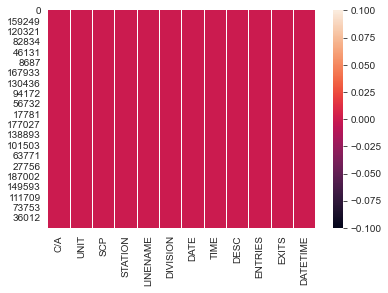

In [111]:
sns.heatmap(mtadf.isna())
plt.savefig('heatmap1.jpb')

In [20]:
mtadf.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'])['ENTRIES'].count().reset_index().sort_values(by = 'ENTRIES', ascending = False).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
2992780,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2
2084694,R101,R001,02-00-02,SOUTH FERRY,2018-05-23 09:00:00,2
3005847,R515,R095,00-00-00,ASTORIA DITMARS,2018-08-07 20:00:00,2
2083263,R101,R001,02-00-00,SOUTH FERRY,2018-05-23 09:00:00,2
3006567,R515,R095,00-00-01,ASTORIA DITMARS,2018-08-07 16:00:00,2


In [21]:
#What is this dual data??
mtadf[mtadf.ENTRIES > 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267759 entries, 0 to 195237
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 324.1+ MB


In [22]:
# It seems roughly 10% of the rows are having a problem...
mtadf[mtadf.ENTRIES == 2].tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
189063,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,07/27/2018,04:00:00,REGULAR,2,895,2018-07-27 04:00:00
189064,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,07/27/2018,08:00:00,REGULAR,2,895,2018-07-27 08:00:00
189065,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,07/27/2018,12:00:00,REGULAR,2,895,2018-07-27 12:00:00
189066,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,07/27/2018,16:00:00,REGULAR,2,895,2018-07-27 16:00:00
189067,R626,R062,00-05-01,CROWN HTS-UTICA,34,IRT,07/27/2018,20:00:00,REGULAR,2,895,2018-07-27 20:00:00


In [23]:
mtadf.drop_duplicates(subset = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME','DIVISION','DATE','TIME', 'ENTRIES','DATETIME'], inplace = True)

In [24]:
mtadf.groupby(['C/A', 'UNIT','SCP', 'STATION', 'DATETIME'])['ENTRIES'].count().sort_values().reset_index()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
1,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 08:00:00,1
2,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 12:00:00,1
3,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 16:00:00,1
4,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 20:00:00,1
...,...,...,...,...,...,...
3344137,N139,R355,00-00-00,111 ST,2018-05-17 09:00:00,1
3344138,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2
3344139,R515,R095,00-00-00,ASTORIA DITMARS,2018-08-08 04:00:00,2
3344140,R515,R095,00-00-00,ASTORIA DITMARS,2018-08-07 20:00:00,2


Duplicates have been weeded out.

In [25]:
mask = ((mtadf['C/A']=='A002')&
       (mtadf['UNIT']=='R051')&
       (mtadf['SCP']=='02-00-00')&
        (mtadf['STATION']=='59 ST'))
        

These are the cumulative entries for just one station: 59 ST.

In [26]:
mtadf[mask].groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE', 'TIME','DATETIME']).ENTRIES.first().reset_index().sort_values(by = 'ENTRIES', ascending = False)

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES
712,A002,R051,02-00-00,59 ST,08/24/2018,20:00:00,2018-08-24 20:00:00,6735887
711,A002,R051,02-00-00,59 ST,08/24/2018,16:00:00,2018-08-24 16:00:00,6735291
710,A002,R051,02-00-00,59 ST,08/24/2018,12:00:00,2018-08-24 12:00:00,6734957
709,A002,R051,02-00-00,59 ST,08/24/2018,08:00:00,2018-08-24 08:00:00,6734813
708,A002,R051,02-00-00,59 ST,08/24/2018,04:00:00,2018-08-24 04:00:00,6734778
...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864


And the cumulative entries for the etire dataset:

In [27]:
mtadf_daily = mtadf.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'DATETIME']).ENTRIES.first().reset_index()

In [28]:
mtadf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,00:00:00,2018-04-28 00:00:00,6598847
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175


# Finding the actual entries:

In [29]:
mtadf_daily[['PREV_DATE', 'PREV_ENTRY']] = mtadf_daily[['DATE', 'ENTRIES']].apply(lambda x: x.shift(1))

In [30]:
mtadf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRY
0,A002,R051,02-00-00,59 ST,04/28/2018,00:00:00,2018-04-28 00:00:00,6598847,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864,04/28/2018,6598847.0
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880,04/28/2018,6598864.0
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961,04/28/2018,6598880.0
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175,04/28/2018,6598961.0


In [31]:
#To eliminate NaNs:
mtadf_daily.dropna(subset = ['PREV_DATE'], axis = 0, inplace = True)

In [32]:
mtadf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRY
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864,04/28/2018,6598847.0
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880,04/28/2018,6598864.0
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961,04/28/2018,6598880.0
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175,04/28/2018,6598961.0
5,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,6599456,04/28/2018,6599175.0


# Spooky / Reverse Entries: What proportion of the total data do they make up?

In [33]:
spooky = len(mtadf_daily[mtadf_daily['ENTRIES']< mtadf_daily['PREV_ENTRY']])

In [34]:
OK = len(mtadf_daily[mtadf_daily['ENTRIES']>mtadf_daily['PREV_ENTRY']])

In [35]:
print(spooky, OK)

30776 2812341


In [36]:
(spooky/OK)*100

1.0943196433149465

1% is a very small proportion of the data. 

The proportion is too small to statistically affect the integrity of any findings. So we can ignore this data

# We can employ a function to reset these counters:

In [37]:
def get_daily_counts(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRY']
    if counter < 0:
        counter = -counter #Flip the counter
    if counter > max_counter:
        print(row['ENTRIES'], row['PREV_ENTRY'])
        counter = min(row['ENTRIES'], row['PREV_ENTRY'])
    if counter > max_counter:
        return 0
    return counter
 
#Maximum negative counter = 2142302244.
#So we set max_counter to 2142500000

In [38]:
mtadf_daily['DAILY_ENTRIES'] = mtadf_daily.apply(get_daily_counts, axis = 1, max_counter = 2142500000)

In [39]:
mtadf_daily.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRY,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864,04/28/2018,6598847.0,17.0
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880,04/28/2018,6598864.0,16.0
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961,04/28/2018,6598880.0,81.0
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175,04/28/2018,6598961.0,214.0
5,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,6599456,04/28/2018,6599175.0,281.0


In [40]:
mtadf_daily1 = mtadf_daily

In [41]:
mtadf_daily1.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRY,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864,04/28/2018,6598847.0,17.0
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880,04/28/2018,6598864.0,16.0
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961,04/28/2018,6598880.0,81.0
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175,04/28/2018,6598961.0,214.0
5,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,6599456,04/28/2018,6599175.0,281.0


In [42]:
#Delete the PREV_DATE column. We no longer need it.
mtadf_daily1.drop(columns = 'PREV_DATE', axis = 1, inplace = True)

In [43]:
mtadf_daily1.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,ENTRIES,PREV_ENTRY,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,6598864,6598847.0,17.0
2,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,6598880,6598864.0,16.0
3,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,6598961,6598880.0,81.0
4,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,6599175,6598961.0,214.0
5,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,6599456,6599175.0,281.0


# Let us aggregate the data into more project-friendly segments

In [44]:
#Aggregate all the turnstiles

turnstiles_daily_ALL = mtadf_daily1.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE','TIME','DATETIME'])['DAILY_ENTRIES'].sum().reset_index()

In [45]:
turnstiles_daily_ALL.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,17.0
1,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,16.0
2,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,81.0
3,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,214.0
4,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,281.0


In [46]:
turnstiles_daily_ALL['WEEK'] = pd.to_datetime(turnstiles_daily_ALL['DATE']).dt.isocalendar().week

In [47]:
turnstiles_daily_ALL['MONTH'] = pd.to_datetime(turnstiles_daily_ALL['DATE']).dt.month

In [48]:
turnstiles_daily_ALL.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH
0,A002,R051,02-00-00,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,17.0,17,4
1,A002,R051,02-00-00,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,16.0,17,4
2,A002,R051,02-00-00,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,81.0,17,4
3,A002,R051,02-00-00,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,214.0,17,4
4,A002,R051,02-00-00,59 ST,04/28/2018,20:00:00,2018-04-28 20:00:00,281.0,17,4


In [49]:
turnstiles_daily_ALL['MONTH'].value_counts()

5    872765
7    869065
6    843210
8    674572
4     84529
Name: MONTH, dtype: int64

In [50]:
#Aggregate by Control Area:

turnstiles_daily_CA = turnstiles_daily_ALL.groupby(['C/A', 'UNIT', 'STATION', 'DATE', 'TIME'])['DAILY_ENTRIES'].sum().reset_index()

In [51]:
turnstiles_daily_CA.head()

,C/A,UNIT,STATION,DATE,TIME,DAILY_ENTRIES
0,A002,R051,59 ST,04/28/2018,00:00:00,35455598.0
1,A002,R051,59 ST,04/28/2018,04:00:00,228.0
2,A002,R051,59 ST,04/28/2018,08:00:00,183.0
3,A002,R051,59 ST,04/28/2018,12:00:00,1026.0
4,A002,R051,59 ST,04/28/2018,16:00:00,2250.0


In [52]:
#Aggregate all station data per week:

turnstile_CA_WEEKLY = turnstiles_daily_ALL.groupby(['C/A', 'UNIT', 'STATION','DATE', 'TIME', 'DATETIME', 'WEEK'])['DAILY_ENTRIES'].sum().reset_index()

In [53]:
turnstile_CA_WEEKLY.head()

,C/A,UNIT,STATION,DATE,TIME,DATETIME,WEEK,DAILY_ENTRIES
0,A002,R051,59 ST,04/28/2018,00:00:00,2018-04-28 00:00:00,17,35455598.0
1,A002,R051,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,17,228.0
2,A002,R051,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,17,183.0
3,A002,R051,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,17,1026.0
4,A002,R051,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,17,2250.0


In [54]:
turnstile_CA_WEEKLY.rename(columns = {'DAILY_ENTRIES': 'WEEKLY_ENTRIES'}, inplace = True)

In [55]:
turnstile_CA_WEEKLY.head()

,C/A,UNIT,STATION,DATE,TIME,DATETIME,WEEK,WEEKLY_ENTRIES
0,A002,R051,59 ST,04/28/2018,00:00:00,2018-04-28 00:00:00,17,35455598.0
1,A002,R051,59 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,17,228.0
2,A002,R051,59 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,17,183.0
3,A002,R051,59 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,17,1026.0
4,A002,R051,59 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,17,2250.0


In [56]:
turnstiles_WEEKLY_STATION = turnstile_CA_WEEKLY.groupby(['STATION'])['WEEKLY_ENTRIES'].sum().reset_index()

In [57]:
turnstiles_WEEKLY_STATION.head()

,STATION,WEEKLY_ENTRIES
0,1 AV,2.378014e+09
1,103 ST,1.513280e+08
2,103 ST-CORONA,5.130890e+07
3,104 ST,5.736306e+09
4,110 ST,1.838588e+07


In [58]:
turnstiles_WEEKLY_STATION.rename(columns = {'WEEKLY_ENTRIES': 'WEEKLY_TOTALS'}, inplace = True)

In [59]:
turnstiles_WEEKLY_STATION.head()

,STATION,WEEKLY_TOTALS
0,1 AV,2.378014e+09
1,103 ST,1.513280e+08
2,103 ST-CORONA,5.130890e+07
3,104 ST,5.736306e+09
4,110 ST,1.838588e+07


A LOOK AT THE MONTHLY DISTRIBUTION

In [65]:
#WE SHALL NEED TO ALSO BUILD THIS DATA:


In [66]:
turnstiles_MONTHLY = turnstiles_daily_ALL.groupby(['STATION', 'MONTH'])['DAILY_ENTRIES'].sum().reset_index()

In [67]:
turnstiles_MONTHLY.rename(columns = {'DAILY_ENTRIES': 'MONTHLY_TOTALS'}, inplace = True)

In [68]:
turnstiles_MONTHLY.rename(columns = {'MONTHLY_TOTALS': 'MONTHLY_ENTRIES'}, inplace = True)

In [69]:
station_MONTHLY_TOTALS = turnstiles_MONTHLY.groupby(['STATION'])['MONTHLY_ENTRIES'].sum().reset_index()

In [70]:
station_MONTHLY_TOTALS.rename(columns = {'MONTHLY_ENTRIES': 'MONTHLY_TOTALS'}, inplace = True)

Let us plot this!!

# The busiest stations:

In [75]:
turnstiles_MONTHLY_sorted = turnstiles_MONTHLY.sort_values(by = 'MONTHLY_ENTRIES', ascending = False)

In [76]:
busiest_50 = turnstiles_MONTHLY_sorted.iloc[:50,:]

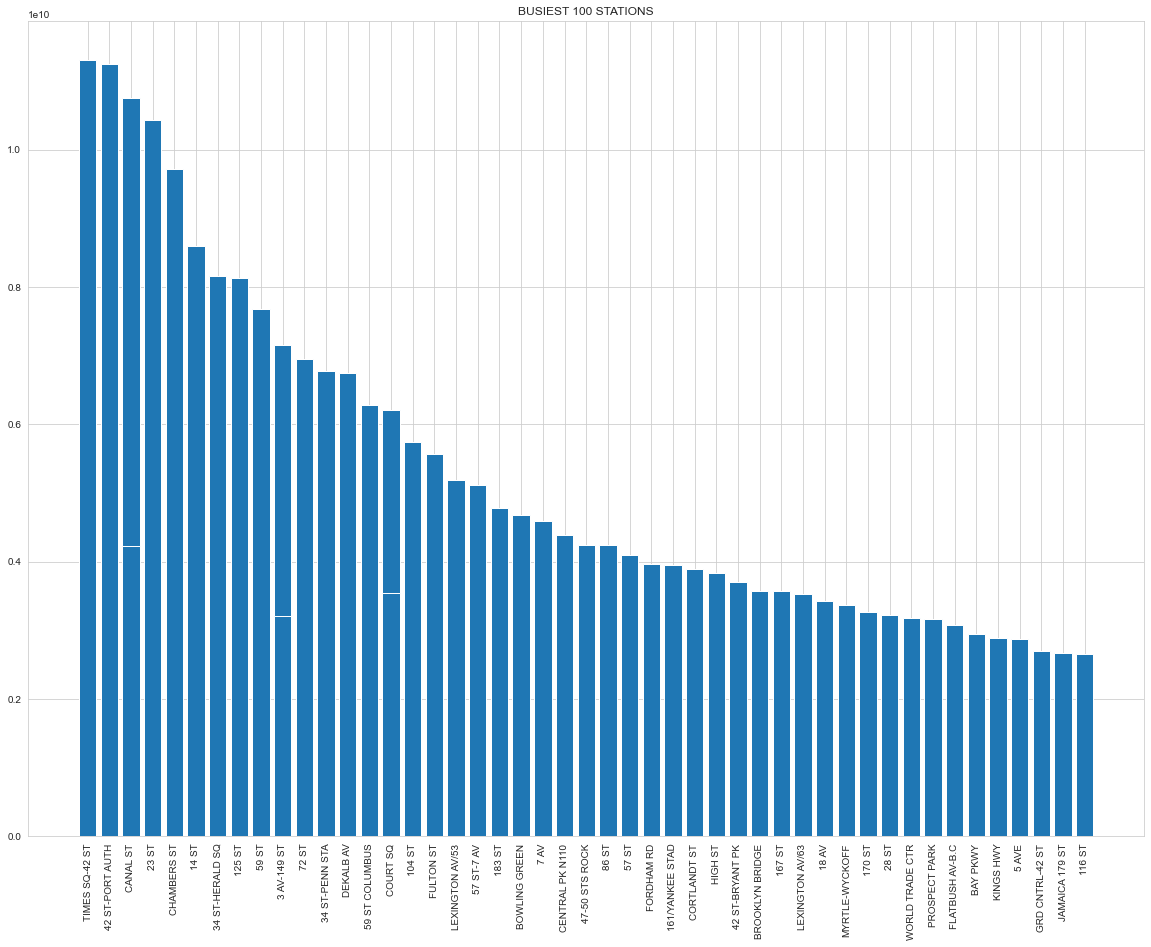

In [77]:
plt.figure(figsize = (20,15))
plt.bar(x = 'STATION', height = 'MONTHLY_ENTRIES', data = busiest_50)
plt.title('BUSIEST 100 STATIONS')
plt.xticks(rotation = 90)
plt.savefig('top_50_stations.png');

# Let us examine the busiest stations a little further..
Let us sample the top 3: TIMES SQ-42 ST, 42 ST-PORT AUTH & CANAL ST

In [78]:
#1. April is very often not summer proper. So let is keep May, June, July and Aug. 

In [79]:
busiest_50.head()

,STATION,MONTH,MONTHLY_ENTRIES
1753,TIMES SQ-42 ST,4,1.130593e+10
330,42 ST-PORT AUTH,4,1.123950e+10
854,CANAL ST,4,1.074344e+10
225,23 ST,4,1.043010e+10
889,CHAMBERS ST,4,9.720310e+09


In [80]:
mask_x = ((turnstiles_daily_ALL['STATION']== 'TIMES SQ-42 ST') |
       (turnstiles_daily_ALL['STATION']== '42 ST-PORT AUTH') |
       (turnstiles_daily_ALL['STATION'] == 'CANAL ST'))

In [81]:
top3_sample = turnstiles_daily_ALL[mask_x]

In [82]:
top3_sample.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH
44360,A021,R032,01-00-00,TIMES SQ-42 ST,04/28/2018,00:00:00,2018-04-28 00:00:00,59420621.0,17,4
44361,A021,R032,01-00-00,TIMES SQ-42 ST,04/28/2018,04:00:00,2018-04-28 04:00:00,116.0,17,4
44362,A021,R032,01-00-00,TIMES SQ-42 ST,04/28/2018,08:00:00,2018-04-28 08:00:00,89.0,17,4
44363,A021,R032,01-00-00,TIMES SQ-42 ST,04/28/2018,12:00:00,2018-04-28 12:00:00,281.0,17,4
44364,A021,R032,01-00-00,TIMES SQ-42 ST,04/28/2018,16:00:00,2018-04-28 16:00:00,406.0,17,4


In [83]:
top3_sampleA = top3_sample.set_index('DATE')

In [84]:
top3_sampleA.head()

,C/A,UNIT,SCP,STATION,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH
DATE,,,,,,,,,
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,00:00:00,2018-04-28 00:00:00,59420621.0,17,4
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,04:00:00,2018-04-28 04:00:00,116.0,17,4
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,08:00:00,2018-04-28 08:00:00,89.0,17,4
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,12:00:00,2018-04-28 12:00:00,281.0,17,4
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,16:00:00,2018-04-28 16:00:00,406.0,17,4


In [85]:
top3_sampleA['DAY'] = pd.to_datetime(top3_sampleA.index).day_name()

In [86]:
top3_sampleA.head()

,C/A,UNIT,SCP,STATION,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH,DAY
DATE,,,,,,,,,,
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,00:00:00,2018-04-28 00:00:00,59420621.0,17,4,Saturday
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,04:00:00,2018-04-28 04:00:00,116.0,17,4,Saturday
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,08:00:00,2018-04-28 08:00:00,89.0,17,4,Saturday
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,12:00:00,2018-04-28 12:00:00,281.0,17,4,Saturday
04/28/2018,A021,R032,01-00-00,TIMES SQ-42 ST,16:00:00,2018-04-28 16:00:00,406.0,17,4,Saturday


In [87]:
top3_may2aug = top3_sampleA[top3_sampleA.index > '04/30/2018']

In [88]:
top3_may2aug.MONTH.value_counts()

5    29712
7    29529
6    28628
8    23198
Name: MONTH, dtype: int64

In [89]:
top3_may2aug.head()


,C/A,UNIT,SCP,STATION,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH,DAY
DATE,,,,,,,,,,
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,00:00:00,2018-05-01 00:00:00,534.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,04:00:00,2018-05-01 04:00:00,71.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,08:00:00,2018-05-01 08:00:00,345.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,12:00:00,2018-05-01 12:00:00,603.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,16:00:00,2018-05-01 16:00:00,651.0,18,5,Tuesday


In [90]:
top3_may2aug['DAY'] = pd.to_datetime(top3_may2aug.index).day_name()

<ipython-input-90-7031f2ac11c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_may2aug['DAY'] = pd.to_datetime(top3_may2aug.index).day_name()


In [91]:
top3_may2aug.head()

,C/A,UNIT,SCP,STATION,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH,DAY
DATE,,,,,,,,,,
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,00:00:00,2018-05-01 00:00:00,534.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,04:00:00,2018-05-01 04:00:00,71.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,08:00:00,2018-05-01 08:00:00,345.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,12:00:00,2018-05-01 12:00:00,603.0,18,5,Tuesday
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,16:00:00,2018-05-01 16:00:00,651.0,18,5,Tuesday


In [92]:
top3_may2aug['DATE'] = top3_may2aug['DATETIME'].dt.date

<ipython-input-92-b1f2bf9e118f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_may2aug['DATE'] = top3_may2aug['DATETIME'].dt.date


In [93]:
top3_may2aug.head()

,C/A,UNIT,SCP,STATION,TIME,DATETIME,DAILY_ENTRIES,WEEK,MONTH,DAY,DATE
DATE,,,,,,,,,,,
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,00:00:00,2018-05-01 00:00:00,534.0,18,5,Tuesday,2018-05-01
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,04:00:00,2018-05-01 04:00:00,71.0,18,5,Tuesday,2018-05-01
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,08:00:00,2018-05-01 08:00:00,345.0,18,5,Tuesday,2018-05-01
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,12:00:00,2018-05-01 12:00:00,603.0,18,5,Tuesday,2018-05-01
05/01/2018,A021,R032,01-00-00,TIMES SQ-42 ST,16:00:00,2018-05-01 16:00:00,651.0,18,5,Tuesday,2018-05-01


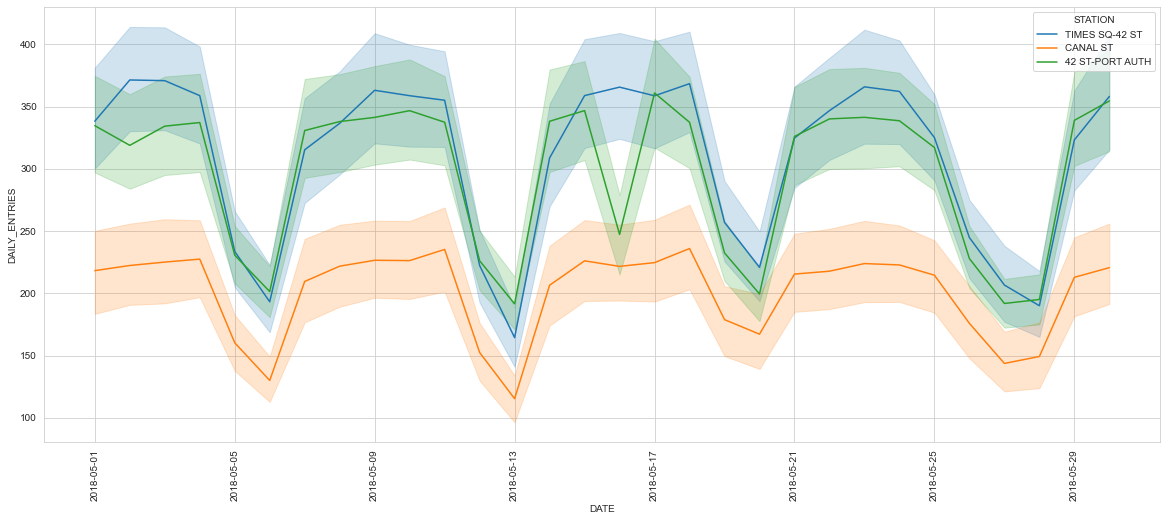

In [114]:
plt.figure(figsize = (20,8))
sns.lineplot(x = 'DATE', y = 'DAILY_ENTRIES', data = top3_may2aug[top3_may2aug.index < '05/31/2018'], hue = 'STATION')
plt.xticks(rotation = 90)
plt.savefig('one_month_run.jpg')
plt.savefig('sample_month_run.jpg');

# DAY ILLUSTRATION
The daily time series helps us identify the best time-window for equipment sterilization and stock replenishment for the next business day. And it's not long.

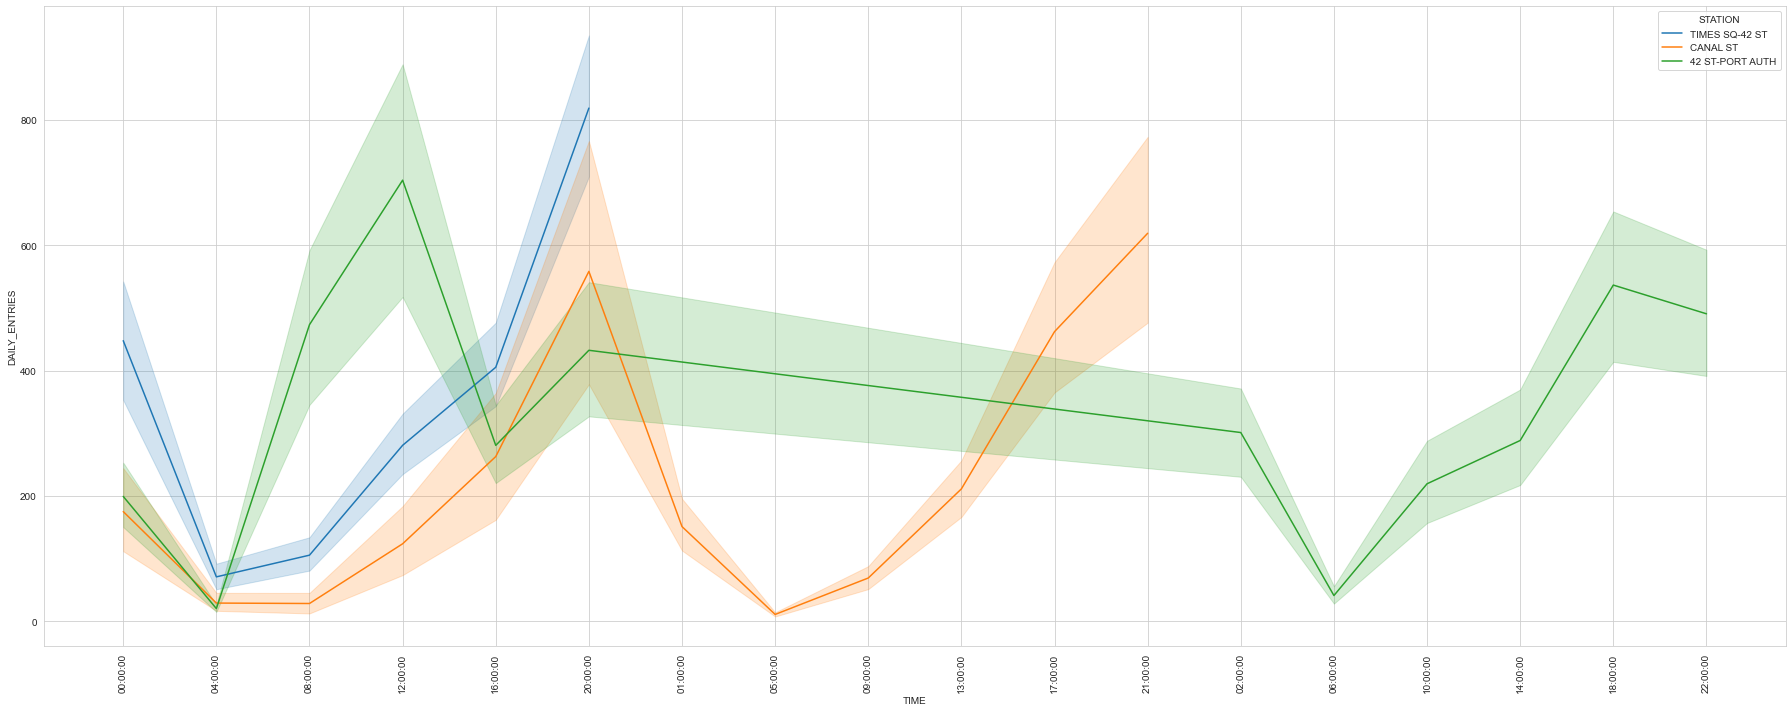

In [116]:
plt.figure(figsize = (25,10))
sns.lineplot(x = 'TIME', y = 'DAILY_ENTRIES', hue = 'STATION', data = top3_may2aug[(top3_may2aug.index >'05/10/2018') & (top3_may2aug.index <'05/12/2018')])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('sample_day_run1.jpg');

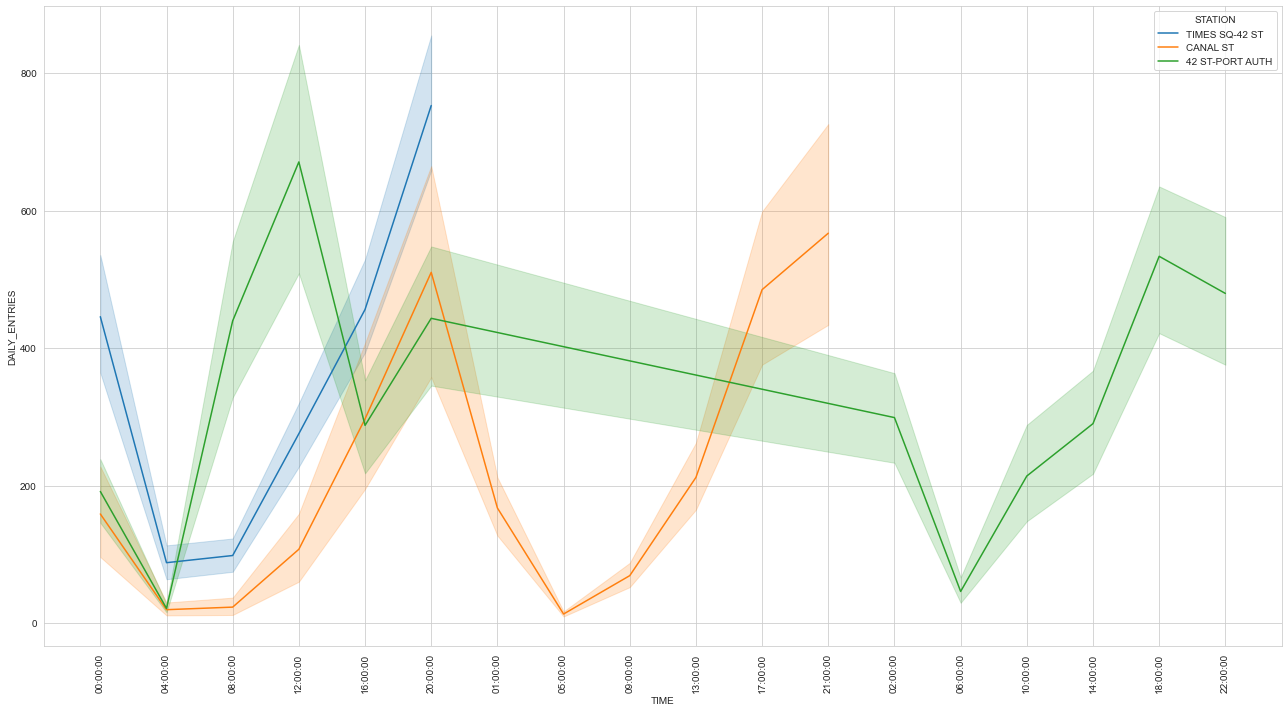

In [120]:
plt.figure(figsize = (18,10))
sns.lineplot(x = 'TIME', y = 'DAILY_ENTRIES', hue = 'STATION', data = top3_may2aug[(top3_may2aug.index >'06/28/2018') & (top3_may2aug.index <'06/30/2018')])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('sample_day_run2.jpg');

The best possible time-window is 0400HRS to 0500HRS